<a href="https://colab.research.google.com/github/Meenusj/Case_study/blob/main/Roberta_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/reddit_filtered_dataset.csv')


# Print column names to identify the correct column
print(df.columns)

Index(['Data', 'Labels'], dtype='object')


In [3]:
import pandas as pd
import random

# Function to apply character-level mutation operators to a word
def mutate_word(word, mutation_operators):
    mutated_word = word
    for operator in mutation_operators:
        if operator[0] in mutated_word:
            mutated_word = mutated_word.replace(operator[0], operator[1])
    return mutated_word

# Function to generate mutation operators for articles, adjectives, and adverbs
def generate_mutation_operators():
    mutation_operators = []

    # Mutation operators for articles
    articles = [("a", "α"), ("an", "αn"), ("the", "thε")]

    # Mutation operators for adjectives (assuming a list of common adjectives)
    adjectives = [("old", "ołd"), ("new", "ñew"), ("big", "ßig")]  # Example mutations

    # Mutation operators for adverbs (assuming a list of common adverbs)
    adverbs = [("quickly", "qüickly"), ("slowly", "ßlowly"), ("happily", "happiły")]  # Example mutations

    return articles, adjectives, adverbs



# Extract the 'text' column
text_column = df['Data']

# Generate mutation operators
articles, adjectives, adverbs = generate_mutation_operators()

# Apply mutation operators to each text string in the dataset and save original and mutated text
original_texts = []
mutated_articles = []
mutated_adjectives = []
mutated_adverbs = []

for text in text_column:
    original_texts.append(text)

    # Apply mutation operators to each word in the text
    mutated_article = [mutate_word(word, articles) for word in text.split()]
    mutated_adjective = [mutate_word(word, adjectives) for word in text.split()]
    mutated_adverb = [mutate_word(word, adverbs) for word in text.split()]

    mutated_articles.append(" ".join(mutated_article))
    mutated_adjectives.append(" ".join(mutated_adjective))
    mutated_adverbs.append(" ".join(mutated_adverb))

# Create new columns in the DataFrame to store original text and mutation operators
df['original_text'] = original_texts
df['char_mutated_article'] = mutated_articles
df['char_mutated_adjective'] = mutated_adjectives
df['char_mutated_adverb'] = mutated_adverbs

# Save the DataFrame with original text and mutation operators
df.to_csv("character_level_mutation.csv", index=False)


In [4]:
import pandas as pd
import random

# Function to apply word-level mutation operators to a text
def mutate_text(text, mutation_words):
    mutated_text = text
    for word in mutation_words:
        mutated_text = mutated_text.replace(word, "")
    return mutated_text

# Function to generate mutation words for articles, adjectives, and adverbs
def generate_mutation_words():
    mutation_words = []

    # Mutation words for articles
    articles = ["a", "an", "the"]
    mutation_words.extend(articles)

    # Mutation words for adjectives (assuming a list of common adjectives)
    adjectives = ["old", "new", "big"]  # Example words
    mutation_words.extend(adjectives)

    # Mutation words for adverbs (assuming a list of common adverbs)
    adverbs = ["quickly", "slowly", "happily"]  # Example words
    mutation_words.extend(adverbs)

    return articles, adjectives, adverbs



# Extract the 'text' column
text_column = df['Data']

# Generate mutation words
articles, adjectives, adverbs = generate_mutation_words()

# Apply word-level mutation operators to each text string in the dataset and save mutated text
mutated_articles = []
mutated_adjectives = []
mutated_adverbs = []
for text in text_column:
    mutated_articles.append(mutate_text(text, articles))
    mutated_adjectives.append(mutate_text(text, adjectives))
    mutated_adverbs.append(mutate_text(text, adverbs))

# Create new columns in the DataFrame to store mutated text
df['word_mutated_articles'] = mutated_articles
df['word_mutated_adjectives'] = mutated_adjectives
df['word_mutated_adverbs'] = mutated_adverbs

# Save the DataFrame with mutated text
df.to_csv("word_level_mutation.csv", index=False)


In [5]:
import pandas as pd

# Load character-level mutation DataFrame
char_level_df = pd.read_csv("character_level_mutation.csv")

# Load word-level mutation DataFrame
word_level_df = pd.read_csv("word_level_mutation.csv")

# Merge DataFrames based on index or a common column (e.g., 'id' if exists)
# Assuming both DataFrames have the same number of rows and in the same order
combined_df = pd.concat([char_level_df, word_level_df], axis=1)

# Save the combined DataFrame to a CSV file
combined_df.to_csv("combined_mutation_results.csv", index=False)


In [6]:
!pip install transformers[torch]
!pip install accelerate -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [9]:
!pip install transformers[torch]

In [11]:
!pip install accelerate -U


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "/content/combined_mutation_results.csv"  # Replace with the actual path
df = pd.read_csv(file_path)

# Preprocess the text data
def preprocess_text(text):
    return text.lower()

mutation_columns = ['char_mutated_article', 'char_mutated_adjective', 'char_mutated_adverb',
                    'word_mutated_articles', 'word_mutated_adjectives', 'word_mutated_adverbs']

for col in mutation_columns:
    df[col] = df[col].apply(preprocess_text)

# Concatenate mutation columns into one
df['mutations_combined'] = df[mutation_columns].apply(lambda x: ' '.join(x), axis=1)

# Split the dataset into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

# Shuffle the datasets
train_df = shuffle(train_df, random_state=42).reset_index(drop=True)
val_df = shuffle(val_df, random_state=42).reset_index(drop=True)
test_df = shuffle(test_df, random_state=42).reset_index(drop=True)

# Define file paths for saving the datasets
train_file = "train.csv"
val_file = "validation.csv"
test_file = "test.csv"

# Save the datasets to CSV files
train_df.to_csv(train_file, index=False)
val_df.to_csv(val_file, index=False)
test_df.to_csv(test_file, index=False)

# Load RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Tokenize the text data
train_encodings = tokenizer(train_df['mutations_combined'].tolist(), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_df['mutations_combined'].tolist(), truncation=True, padding=True, max_length=128)

# Convert labels to numerical format (already mapped in the dataset)
train_labels = train_df['Labels'].tolist()
val_labels = val_df['Labels'].tolist()

# Create PyTorch datasets
class DetectionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = DetectionDataset(train_encodings, train_labels)
val_dataset = DetectionDataset(val_encodings, val_labels)

# Load pre-trained RoBERTa-Base model
roberta_base_model = RobertaForSequenceClassification.from_pretrained("roberta-base")

# Define the training arguments with reduced batch size
training_args = TrainingArguments(
    output_dir="./roberta_base_model",
    num_train_epochs=50,
    per_device_train_batch_size=32,  # Reduce the batch size here
    per_device_eval_batch_size=32,    # Reduce the batch size here
    logging_dir="./logs",
    logging_steps=100,
    evaluation_strategy="steps",
    eval_steps=100,
    learning_rate=1e-4,
    load_best_model_at_end=True,
)

# Define the Trainer with the updated training arguments
trainer = Trainer(
    model=roberta_base_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=lambda pred: {"accuracy": accuracy_score(pred.label_ids, pred.predictions.argmax(-1))},
)

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is depr

Step,Training Loss,Validation Loss,Accuracy
100,0.296800,0.158629,0.925144
200,0.239600,0.118074,0.976967
300,0.333200,0.473518,0.821497
400,0.531700,0.471973,0.821497
500,0.541700,0.470204,0.821497
600,0.520200,0.470539,0.821497
700,0.532600,0.471548,0.821497
800,0.525100,0.469255,0.821497
900,0.534400,0.481073,0.821497
1000,0.525200,0.469124,0.821497


Step,Training Loss,Validation Loss,Accuracy
100,0.296800,0.158629,0.925144
200,0.239600,0.118074,0.976967
300,0.333200,0.473518,0.821497
400,0.531700,0.471973,0.821497
500,0.541700,0.470204,0.821497
600,0.520200,0.470539,0.821497
700,0.532600,0.471548,0.821497
800,0.525100,0.469255,0.821497
900,0.534400,0.481073,0.821497
1000,0.525200,0.469124,0.821497


TrainOutput(global_step=7350, training_loss=0.5035799267827248, metrics={'train_runtime': 5975.5402, 'train_samples_per_second': 39.235, 'train_steps_per_second': 1.23, 'total_flos': 1.5421596732288e+16, 'train_loss': 0.5035799267827248, 'epoch': 50.0})

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the source and destination paths
source_path = "./roberta_base_model"  # Path to the folder you want to move
destination_path = "/content/drive/MyDrive/roberta_base_model"  # Path in your Google Drive

# Move the folder to your Google Drive
!cp -r $source_path $destination_path


Mounted at /content/drive


In [2]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Tokenize the original test data
test_original_encodings = tokenizer(test_df['original_text'].tolist(), truncation=True, padding=True, max_length=128)


# Create PyTorch dataset for original test data
test_original_labels = test_df['Labels'].tolist()
test_original_dataset = DetectionDataset(test_original_encodings, test_original_labels)

# Evaluate on the original test set
original_predictions = trainer.predict(test_original_dataset)

# Get predicted labels and probabilities
original_predicted_labels = original_predictions.predictions.argmax(-1)
original_probs = torch.nn.functional.softmax(torch.tensor(original_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for original text
original_accuracy = accuracy_score(test_original_labels, original_predicted_labels)
original_auc = roc_auc_score(test_original_labels, original_probs[:, 1])

# Print accuracy and AUC for original text
print("Original Text:")
print(f"Accuracy: {original_accuracy}")
print(f"AUC: {original_auc}")


Original Text:
Accuracy: 0.8081350729086723
AUC: 0.728412155745489


In [3]:
# Tokenize the original test data for char_mutated_article mutation
test_char_mutated_article_encodings = tokenizer(test_df['char_mutated_article'].tolist(), truncation=True, padding=True, max_length=128)

# Create PyTorch dataset for char_mutated_article mutation
test_char_mutated_article_labels = test_df['Labels'].tolist()
test_char_mutated_article_dataset = DetectionDataset(test_char_mutated_article_encodings, test_char_mutated_article_labels)

# Evaluate on the char_mutated_article test set
char_mutated_article_predictions = trainer.predict(test_char_mutated_article_dataset)

# Get predicted labels and probabilities
char_mutated_article_predicted_labels = char_mutated_article_predictions.predictions.argmax(-1)
char_mutated_article_probs = torch.nn.functional.softmax(torch.tensor(char_mutated_article_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for char_mutated_article mutation
char_mutated_article_accuracy = accuracy_score(test_char_mutated_article_labels, char_mutated_article_predicted_labels)
char_mutated_article_auc = roc_auc_score(test_char_mutated_article_labels, char_mutated_article_probs[:, 1])

# Print accuracy and AUC for char_mutated_article mutation
print("Char Mutated Article Mutation:")
print(f"Accuracy: {char_mutated_article_accuracy}")
print(f"AUC: {char_mutated_article_auc}")


Char Mutated Article Mutation:
Accuracy: 0.8081350729086723
AUC: 0.5151263057929725


In [4]:
# Tokenize the original test data for char_mutated_adjective mutation
test_char_mutated_adjective_encodings = tokenizer(test_df['char_mutated_adjective'].tolist(), truncation=True, padding=True, max_length=128)

# Create PyTorch dataset for char_mutated_adjective mutation
test_char_mutated_adjective_labels = test_df['Labels'].tolist()
test_char_mutated_adjective_dataset = DetectionDataset(test_char_mutated_adjective_encodings, test_char_mutated_adjective_labels)

# Evaluate on the char_mutated_adjective test set
char_mutated_adjective_predictions = trainer.predict(test_char_mutated_adjective_dataset)

# Get predicted labels and probabilities
char_mutated_adjective_predicted_labels = char_mutated_adjective_predictions.predictions.argmax(-1)
char_mutated_adjective_probs = torch.nn.functional.softmax(torch.tensor(char_mutated_adjective_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for char_mutated_adjective mutation
char_mutated_adjective_accuracy = accuracy_score(test_char_mutated_adjective_labels, char_mutated_adjective_predicted_labels)
char_mutated_adjective_auc = roc_auc_score(test_char_mutated_adjective_labels, char_mutated_adjective_probs[:, 1])

# Print accuracy and AUC for char_mutated_adjective mutation
print("Char Mutated Adjective Mutation:")
print(f"Accuracy: {char_mutated_adjective_accuracy}")
print(f"AUC: {char_mutated_adjective_auc}")


Char Mutated Adjective Mutation:
Accuracy: 0.8081350729086723
AUC: 0.7508736942070274


In [5]:
# Tokenize the original test data for char_mutated_adverb mutation
test_char_mutated_adverb_encodings = tokenizer(test_df['char_mutated_adverb'].tolist(), truncation=True, padding=True, max_length=128)

# Create PyTorch dataset for char_mutated_adverb mutation
test_char_mutated_adverb_labels = test_df['Labels'].tolist()
test_char_mutated_adverb_dataset = DetectionDataset(test_char_mutated_adverb_encodings, test_char_mutated_adverb_labels)

# Evaluate on the char_mutated_adverb test set
char_mutated_adverb_predictions = trainer.predict(test_char_mutated_adverb_dataset)

# Get predicted labels and probabilities
char_mutated_adverb_predicted_labels = char_mutated_adverb_predictions.predictions.argmax(-1)
char_mutated_adverb_probs = torch.nn.functional.softmax(torch.tensor(char_mutated_adverb_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for char_mutated_adverb mutation
char_mutated_adverb_accuracy = accuracy_score(test_char_mutated_adverb_labels, char_mutated_adverb_predicted_labels)
char_mutated_adverb_auc = roc_auc_score(test_char_mutated_adverb_labels, char_mutated_adverb_probs[:, 1])

# Print accuracy and AUC for char_mutated_adverb mutation
print("Char Mutated Adverb Mutation:")
print(f"Accuracy: {char_mutated_adverb_accuracy}")
print(f"AUC: {char_mutated_adverb_auc}")


Char Mutated Adverb Mutation:
Accuracy: 0.8081350729086723
AUC: 0.7523437796771131


In [6]:
# Tokenize the original test data for word_mutated_articles mutation
test_word_mutated_articles_encodings = tokenizer(test_df['word_mutated_articles'].tolist(), truncation=True, padding=True, max_length=128)

# Create PyTorch dataset for word_mutated_articles mutation
test_word_mutated_articles_labels = test_df['Labels'].tolist()
test_word_mutated_articles_dataset = DetectionDataset(test_word_mutated_articles_encodings, test_word_mutated_articles_labels)

# Evaluate on the word_mutated_articles test set
word_mutated_articles_predictions = trainer.predict(test_word_mutated_articles_dataset)

# Get predicted labels and probabilities
word_mutated_articles_predicted_labels = word_mutated_articles_predictions.predictions.argmax(-1)
word_mutated_articles_probs = torch.nn.functional.softmax(torch.tensor(word_mutated_articles_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for word_mutated_articles mutation
word_mutated_articles_accuracy = accuracy_score(test_word_mutated_articles_labels, word_mutated_articles_predicted_labels)
word_mutated_articles_auc = roc_auc_score(test_word_mutated_articles_labels, word_mutated_articles_probs[:, 1])

# Print accuracy and AUC for word_mutated_articles mutation
print("Word Mutated Articles Mutation:")
print(f"Accuracy: {word_mutated_articles_accuracy}")
print(f"AUC: {word_mutated_articles_auc}")

# Repeat the process for word_mutated_adjectives mutation
test_word_mutated_adjectives_encodings = tokenizer(test_df['word_mutated_adjectives'].tolist(), truncation=True, padding=True, max_length=128)
test_word_mutated_adjectives_labels = test_df['Labels'].tolist()
test_word_mutated_adjectives_dataset = DetectionDataset(test_word_mutated_adjectives_encodings, test_word_mutated_adjectives_labels)
word_mutated_adjectives_predictions = trainer.predict(test_word_mutated_adjectives_dataset)
word_mutated_adjectives_predicted_labels = word_mutated_adjectives_predictions.predictions.argmax(-1)
word_mutated_adjectives_probs = torch.nn.functional.softmax(torch.tensor(word_mutated_adjectives_predictions.predictions), dim=-1)
word_mutated_adjectives_accuracy = accuracy_score(test_word_mutated_adjectives_labels, word_mutated_adjectives_predicted_labels)
word_mutated_adjectives_auc = roc_auc_score(test_word_mutated_adjectives_labels, word_mutated_adjectives_probs[:, 1])

print("Word Mutated Adjectives Mutation:")
print(f"Accuracy: {word_mutated_adjectives_accuracy}")
print(f"AUC: {word_mutated_adjectives_auc}")

# Repeat the process for word_mutated_adverbs mutation
test_word_mutated_adverbs_encodings = tokenizer(test_df['word_mutated_adverbs'].tolist(), truncation=True, padding=True, max_length=128)
test_word_mutated_adverbs_labels = test_df['Labels'].tolist()
test_word_mutated_adverbs_dataset = DetectionDataset(test_word_mutated_adverbs_encodings, test_word_mutated_adverbs_labels)
word_mutated_adverbs_predictions = trainer.predict(test_word_mutated_adverbs_dataset)
word_mutated_adverbs_predicted_labels = word_mutated_adverbs_predictions.predictions.argmax(-1)
word_mutated_adverbs_probs = torch.nn.functional.softmax(torch.tensor(word_mutated_adverbs_predictions.predictions), dim=-1)
word_mutated_adverbs_accuracy = accuracy_score(test_word_mutated_adverbs_labels, word_mutated_adverbs_predicted_labels)
word_mutated_adverbs_auc = roc_auc_score(test_word_mutated_adverbs_labels, word_mutated_adverbs_probs[:, 1])

print("Word Mutated Adverbs Mutation:")
print(f"Accuracy: {word_mutated_adverbs_accuracy}")
print(f"AUC: {word_mutated_adverbs_auc}")



Word Mutated Articles Mutation:
Accuracy: 0.8081350729086723
AUC: 0.5969439696106363


Word Mutated Adjectives Mutation:
Accuracy: 0.8081350729086723
AUC: 0.7520037986704654


Word Mutated Adverbs Mutation:
Accuracy: 0.8081350729086723
AUC: 0.7521196581196581


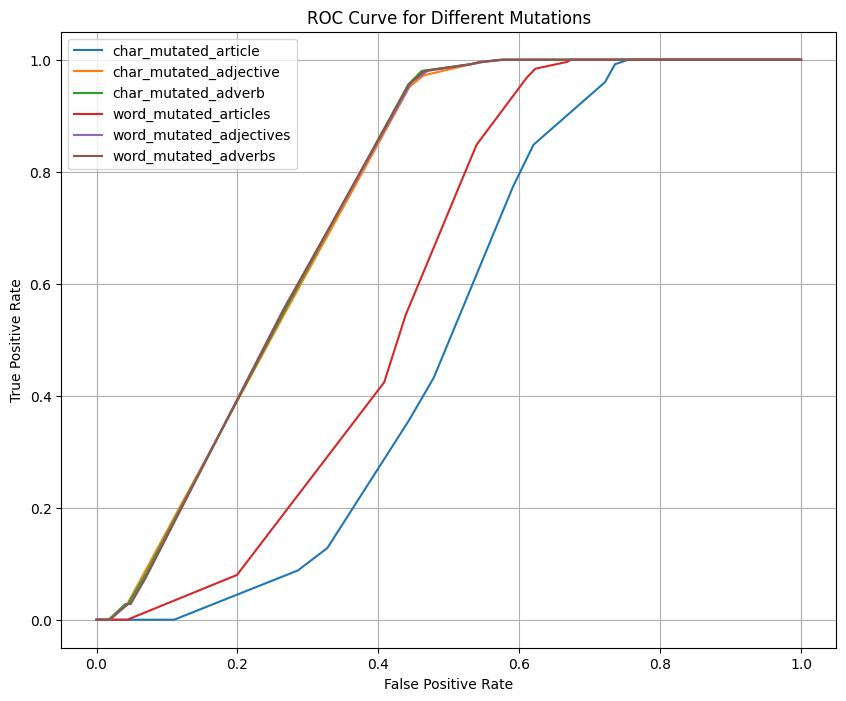

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute FPR and TPR for each mutation type
fpr_char_mutated_article, tpr_char_mutated_article, _ = roc_curve(test_char_mutated_article_labels, char_mutated_article_probs[:, 1])
fpr_char_mutated_adjective, tpr_char_mutated_adjective, _ = roc_curve(test_char_mutated_adjective_labels, char_mutated_adjective_probs[:, 1])
fpr_char_mutated_adverb, tpr_char_mutated_adverb, _ = roc_curve(test_char_mutated_adverb_labels, char_mutated_adverb_probs[:, 1])
fpr_word_mutated_articles, tpr_word_mutated_articles, _ = roc_curve(test_word_mutated_articles_labels, word_mutated_articles_probs[:, 1])
fpr_word_mutated_adjectives, tpr_word_mutated_adjectives, _ = roc_curve(test_word_mutated_adjectives_labels, word_mutated_adjectives_probs[:, 1])
fpr_word_mutated_adverbs, tpr_word_mutated_adverbs, _ = roc_curve(test_word_mutated_adverbs_labels, word_mutated_adverbs_probs[:, 1])

# Plot ROC curves for each mutation type
plt.figure(figsize=(10, 8))

plt.plot(fpr_char_mutated_article, tpr_char_mutated_article, label='char_mutated_article')
plt.plot(fpr_char_mutated_adjective, tpr_char_mutated_adjective, label='char_mutated_adjective')
plt.plot(fpr_char_mutated_adverb, tpr_char_mutated_adverb, label='char_mutated_adverb')
plt.plot(fpr_word_mutated_articles, tpr_word_mutated_articles, label='word_mutated_articles')
plt.plot(fpr_word_mutated_adjectives, tpr_word_mutated_adjectives, label='word_mutated_adjectives')
plt.plot(fpr_word_mutated_adverbs, tpr_word_mutated_adverbs, label='word_mutated_adverbs')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Mutations')
plt.legend()
plt.grid(True)
plt.show()


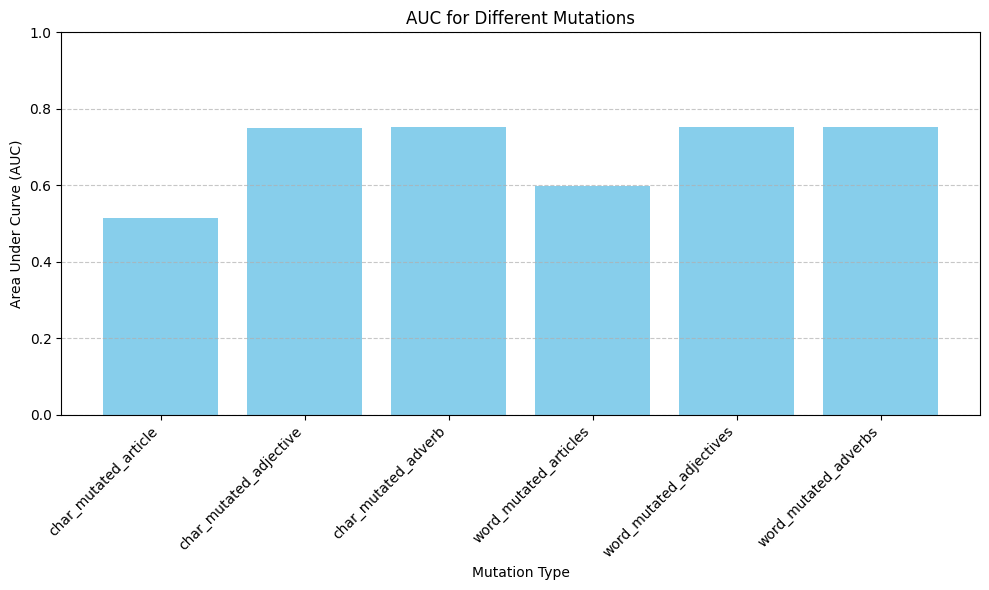

In [8]:
import matplotlib.pyplot as plt

# Define mutation names and AUC scores
mutation_names = ['char_mutated_article', 'char_mutated_adjective', 'char_mutated_adverb',
                  'word_mutated_articles', 'word_mutated_adjectives', 'word_mutated_adverbs']
auc_scores = [char_mutated_article_auc, char_mutated_adjective_auc, char_mutated_adverb_auc,
              word_mutated_articles_auc, word_mutated_adjectives_auc, word_mutated_adverbs_auc]

# Plot AUC scores
plt.figure(figsize=(10, 6))
plt.bar(mutation_names, auc_scores, color='skyblue')
plt.xlabel('Mutation Type')
plt.ylabel('Area Under Curve (AUC)')
plt.title('AUC for Different Mutations')
plt.ylim(0, 1)  # Set y-axis limit
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [26]:
import pandas as pd

df = pd.read_csv('/content/article_level_data.csv')


# Print column names to identify the correct column
print(df.columns)

Index(['Unnamed: 0', 'article', 'class'], dtype='object')


In [27]:
import pandas as pd
import random

# Function to apply character-level mutation operators to a word
def mutate_word(word, mutation_operators):
    mutated_word = word
    for operator in mutation_operators:
        if operator[0] in mutated_word:
            mutated_word = mutated_word.replace(operator[0], operator[1])
    return mutated_word

# Function to generate mutation operators for articles, adjectives, and adverbs
def generate_mutation_operators():
    mutation_operators = []

    # Mutation operators for articles
    articles = [("a", "α"), ("an", "αn"), ("the", "thε")]

    # Mutation operators for adjectives (assuming a list of common adjectives)
    adjectives = [("old", "ołd"), ("new", "ñew"), ("big", "ßig")]  # Example mutations

    # Mutation operators for adverbs (assuming a list of common adverbs)
    adverbs = [("quickly", "qüickly"), ("slowly", "ßlowly"), ("happily", "happiły")]  # Example mutations

    return articles, adjectives, adverbs



# Extract the 'text' column
text_column = df['article']

# Generate mutation operators
articles, adjectives, adverbs = generate_mutation_operators()

# Apply mutation operators to each text string in the dataset and save original and mutated text
original_texts = []
mutated_articles = []
mutated_adjectives = []
mutated_adverbs = []

for text in text_column:
    original_texts.append(text)

    # Apply mutation operators to each word in the text
    mutated_article = [mutate_word(word, articles) for word in text.split()]
    mutated_adjective = [mutate_word(word, adjectives) for word in text.split()]
    mutated_adverb = [mutate_word(word, adverbs) for word in text.split()]

    mutated_articles.append(" ".join(mutated_article))
    mutated_adjectives.append(" ".join(mutated_adjective))
    mutated_adverbs.append(" ".join(mutated_adverb))

# Create new columns in the DataFrame to store original text and mutation operators
df['original_text'] = original_texts
df['char_mutated_article'] = mutated_articles
df['char_mutated_adjective'] = mutated_adjectives
df['char_mutated_adverb'] = mutated_adverbs

# Save the DataFrame with original text and mutation operators
df.to_csv("character_level_mutation_article.csv", index=False)


In [28]:
import pandas as pd
import random

# Function to apply word-level mutation operators to a text
def mutate_text(text, mutation_words):
    mutated_text = text
    for word in mutation_words:
        mutated_text = mutated_text.replace(word, "")
    return mutated_text

# Function to generate mutation words for articles, adjectives, and adverbs
def generate_mutation_words():
    mutation_words = []

    # Mutation words for articles
    articles = ["a", "an", "the"]
    mutation_words.extend(articles)

    # Mutation words for adjectives (assuming a list of common adjectives)
    adjectives = ["old", "new", "big"]  # Example words
    mutation_words.extend(adjectives)

    # Mutation words for adverbs (assuming a list of common adverbs)
    adverbs = ["quickly", "slowly", "happily"]  # Example words
    mutation_words.extend(adverbs)

    return articles, adjectives, adverbs



# Extract the 'text' column
text_column = df['article']

# Generate mutation words
articles, adjectives, adverbs = generate_mutation_words()

# Apply word-level mutation operators to each text string in the dataset and save mutated text
mutated_articles = []
mutated_adjectives = []
mutated_adverbs = []
for text in text_column:
    mutated_articles.append(mutate_text(text, articles))
    mutated_adjectives.append(mutate_text(text, adjectives))
    mutated_adverbs.append(mutate_text(text, adverbs))

# Create new columns in the DataFrame to store mutated text
df['word_mutated_articles'] = mutated_articles
df['word_mutated_adjectives'] = mutated_adjectives
df['word_mutated_adverbs'] = mutated_adverbs

# Save the DataFrame with mutated text
df.to_csv("word_level_mutation_article.csv", index=False)


In [29]:
import pandas as pd

# Load character-level mutation DataFrame
char_level_df = pd.read_csv("character_level_mutation_article.csv")

# Load word-level mutation DataFrame
word_level_df = pd.read_csv("word_level_mutation_article.csv")

# Merge DataFrames based on index or a common column (e.g., 'id' if exists)
# Assuming both DataFrames have the same number of rows and in the same order
combined_df = pd.concat([char_level_df, word_level_df], axis=1)

# Save the combined DataFrame to a CSV file
combined_df.to_csv("combined_mutation_results_article.csv", index=False)


In [30]:
# Load the dataset
file_path = "/content/combined_mutation_results_article.csv"  # Replace with the actual path
df = pd.read_csv(file_path)

# Preprocess the text data
def preprocess_text(text):
    return text.lower()

mutation_columns = ['char_mutated_article', 'char_mutated_adjective', 'char_mutated_adverb',
                    'word_mutated_articles', 'word_mutated_adjectives', 'word_mutated_adverbs']

for col in mutation_columns:
    df[col] = df[col].apply(preprocess_text)

# Concatenate mutation columns into one
df['mutations_combined'] = df[mutation_columns].apply(lambda x: ' '.join(x), axis=1)

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score

test_df_article=pd.read_csv("/content/combined_mutation_results_article.csv")

# Tokenize the original test data
test_original_encodings = tokenizer(test_df_article['original_text'].tolist(), truncation=True, padding=True, max_length=128)


# Create PyTorch dataset for original test data
test_original_labels = test_df_article['class'].tolist()
test_original_dataset = DetectionDataset(test_original_encodings, test_original_labels)

# Evaluate on the original test set
original_predictions = trainer.predict(test_original_dataset)

# Get predicted labels and probabilities
original_predicted_labels = original_predictions.predictions.argmax(-1)
original_probs = torch.nn.functional.softmax(torch.tensor(original_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for original text
original_accuracy = accuracy_score(test_original_labels, original_predicted_labels)
original_auc = roc_auc_score(test_original_labels, original_probs[:, 1])

# Print accuracy and AUC for original text
print("Original Text:")
print(f"Accuracy: {original_accuracy}")
print(f"AUC: {original_auc}")


Original Text:
Accuracy: 0.5
AUC: 0.43008750159216624


In [20]:
# Tokenize the original test data for char_mutated_article mutation
test_char_mutated_article_encodings = tokenizer(test_df_article['char_mutated_article'].tolist(), truncation=True, padding=True, max_length=128)

# Create PyTorch dataset for char_mutated_article mutation
test_char_mutated_article_labels = test_df_article ['class'].tolist()
test_char_mutated_article_dataset = DetectionDataset(test_char_mutated_article_encodings, test_char_mutated_article_labels)

# Evaluate on the char_mutated_article test set
char_mutated_article_predictions = trainer.predict(test_char_mutated_article_dataset)

# Get predicted labels and probabilities
char_mutated_article_predicted_labels = char_mutated_article_predictions.predictions.argmax(-1)
char_mutated_article_probs = torch.nn.functional.softmax(torch.tensor(char_mutated_article_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for char_mutated_article mutation
char_mutated_article_accuracy = accuracy_score(test_char_mutated_article_labels, char_mutated_article_predicted_labels)
char_mutated_article_auc = roc_auc_score(test_char_mutated_article_labels, char_mutated_article_probs[:, 1])

# Print accuracy and AUC for char_mutated_article mutation
print("Char Mutated Article Mutation:")
print(f"Accuracy: {char_mutated_article_accuracy}")
print(f"AUC: {char_mutated_article_auc}")


Char Mutated Article Mutation:
Accuracy: 0.5
AUC: 0.45081846989937513


In [21]:
# Tokenize the original test data for char_mutated_adjective mutation
test_char_mutated_adjective_encodings = tokenizer(test_df_article ['char_mutated_adjective'].tolist(), truncation=True, padding=True, max_length=128)

# Create PyTorch dataset for char_mutated_adjective mutation
test_char_mutated_adjective_labels = test_df_article ['class'].tolist()
test_char_mutated_adjective_dataset = DetectionDataset(test_char_mutated_adjective_encodings, test_char_mutated_adjective_labels)

# Evaluate on the char_mutated_adjective test set
char_mutated_adjective_predictions = trainer.predict(test_char_mutated_adjective_dataset)

# Get predicted labels and probabilities
char_mutated_adjective_predicted_labels = char_mutated_adjective_predictions.predictions.argmax(-1)
char_mutated_adjective_probs = torch.nn.functional.softmax(torch.tensor(char_mutated_adjective_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for char_mutated_adjective mutation
char_mutated_adjective_accuracy = accuracy_score(test_char_mutated_adjective_labels, char_mutated_adjective_predicted_labels)
char_mutated_adjective_auc = roc_auc_score(test_char_mutated_adjective_labels, char_mutated_adjective_probs[:, 1])

# Print accuracy and AUC for char_mutated_adjective mutation
print("Char Mutated Adjective Mutation:")
print(f"Accuracy: {char_mutated_adjective_accuracy}")
print(f"AUC: {char_mutated_adjective_auc}")


Char Mutated Adjective Mutation:
Accuracy: 0.5
AUC: 0.4452622924876776


In [22]:
# Tokenize the original test data for char_mutated_adverb mutation
test_char_mutated_adverb_encodings = tokenizer(test_df_article ['char_mutated_adverb'].tolist(), truncation=True, padding=True, max_length=128)

# Create PyTorch dataset for char_mutated_adverb mutation
test_char_mutated_adverb_labels = test_df_article ['class'].tolist()
test_char_mutated_adverb_dataset = DetectionDataset(test_char_mutated_adverb_encodings, test_char_mutated_adverb_labels)

# Evaluate on the char_mutated_adverb test set
char_mutated_adverb_predictions = trainer.predict(test_char_mutated_adverb_dataset)

# Get predicted labels and probabilities
char_mutated_adverb_predicted_labels = char_mutated_adverb_predictions.predictions.argmax(-1)
char_mutated_adverb_probs = torch.nn.functional.softmax(torch.tensor(char_mutated_adverb_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for char_mutated_adverb mutation
char_mutated_adverb_accuracy = accuracy_score(test_char_mutated_adverb_labels, char_mutated_adverb_predicted_labels)
char_mutated_adverb_auc = roc_auc_score(test_char_mutated_adverb_labels, char_mutated_adverb_probs[:, 1])

# Print accuracy and AUC for char_mutated_adverb mutation
print("Char Mutated Adverb Mutation:")
print(f"Accuracy: {char_mutated_adverb_accuracy}")
print(f"AUC: {char_mutated_adverb_auc}")


Char Mutated Adverb Mutation:
Accuracy: 0.5
AUC: 0.4561179708276562


In [24]:
# Tokenize the original test data for word_mutated_articles mutation
test_word_mutated_articles_encodings = tokenizer(test_df_article ['word_mutated_articles'].tolist(), truncation=True, padding=True, max_length=128)

# Create PyTorch dataset for word_mutated_articles mutation
test_word_mutated_articles_labels = test_df_article ['class'].tolist()
test_word_mutated_articles_dataset = DetectionDataset(test_word_mutated_articles_encodings, test_word_mutated_articles_labels)

# Evaluate on the word_mutated_articles test set
word_mutated_articles_predictions = trainer.predict(test_word_mutated_articles_dataset)

# Get predicted labels and probabilities
word_mutated_articles_predicted_labels = word_mutated_articles_predictions.predictions.argmax(-1)
word_mutated_articles_probs = torch.nn.functional.softmax(torch.tensor(word_mutated_articles_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for word_mutated_articles mutation
word_mutated_articles_accuracy = accuracy_score(test_word_mutated_articles_labels, word_mutated_articles_predicted_labels)
word_mutated_articles_auc = roc_auc_score(test_word_mutated_articles_labels, word_mutated_articles_probs[:, 1])

# Print accuracy and AUC for word_mutated_articles mutation
print("Word Mutated Articles Mutation:")
print(f"Accuracy: {word_mutated_articles_accuracy}")
print(f"AUC: {word_mutated_articles_auc}")

# Repeat the process for word_mutated_adjectives mutation
test_word_mutated_adjectives_encodings = tokenizer(test_df_article ['word_mutated_adjectives'].tolist(), truncation=True, padding=True, max_length=128)
test_word_mutated_adjectives_labels = test_df_article['class'].tolist()
test_word_mutated_adjectives_dataset = DetectionDataset(test_word_mutated_adjectives_encodings, test_word_mutated_adjectives_labels)
word_mutated_adjectives_predictions = trainer.predict(test_word_mutated_adjectives_dataset)
word_mutated_adjectives_predicted_labels = word_mutated_adjectives_predictions.predictions.argmax(-1)
word_mutated_adjectives_probs = torch.nn.functional.softmax(torch.tensor(word_mutated_adjectives_predictions.predictions), dim=-1)
word_mutated_adjectives_accuracy = accuracy_score(test_word_mutated_adjectives_labels, word_mutated_adjectives_predicted_labels)
word_mutated_adjectives_auc = roc_auc_score(test_word_mutated_adjectives_labels, word_mutated_adjectives_probs[:, 1])

print("Word Mutated Adjectives Mutation:")
print(f"Accuracy: {word_mutated_adjectives_accuracy}")
print(f"AUC: {word_mutated_adjectives_auc}")

# Repeat the process for word_mutated_adverbs mutation
test_word_mutated_adverbs_encodings = tokenizer(test_df_article['word_mutated_adverbs'].tolist(), truncation=True, padding=True, max_length=128)
test_word_mutated_adverbs_labels = test_df_article['class'].tolist()
test_word_mutated_adverbs_dataset = DetectionDataset(test_word_mutated_adverbs_encodings, test_word_mutated_adverbs_labels)
word_mutated_adverbs_predictions = trainer.predict(test_word_mutated_adverbs_dataset)
word_mutated_adverbs_predicted_labels = word_mutated_adverbs_predictions.predictions.argmax(-1)
word_mutated_adverbs_probs = torch.nn.functional.softmax(torch.tensor(word_mutated_adverbs_predictions.predictions), dim=-1)
word_mutated_adverbs_accuracy = accuracy_score(test_word_mutated_adverbs_labels, word_mutated_adverbs_predicted_labels)
word_mutated_adverbs_auc = roc_auc_score(test_word_mutated_adverbs_labels, word_mutated_adverbs_probs[:, 1])

print("Word Mutated Adverbs Mutation:")
print(f"Accuracy: {word_mutated_adverbs_accuracy}")
print(f"AUC: {word_mutated_adverbs_auc}")



Word Mutated Articles Mutation:
Accuracy: 0.5
AUC: 0.4271791447462377


Word Mutated Adjectives Mutation:
Accuracy: 0.5
AUC: 0.4330151574218101


Word Mutated Adverbs Mutation:
Accuracy: 0.5
AUC: 0.42950660218232906


In [32]:
import pandas as pd

data = pd.read_csv('/content/sentence_level_data.csv')


# Print column names to identify the correct column
print(data.columns)

Index(['Unnamed: 0', 'sentence', 'class'], dtype='object')


In [39]:
import pandas as pd
import random

# Function to apply character-level mutation operators to a word
def mutate_word(word, mutation_operators):
    mutated_word = word
    for operator in mutation_operators:
        if operator[0] in mutated_word:
            mutated_word = mutated_word.replace(operator[0], operator[1])
    return mutated_word

# Function to generate mutation operators for articles, adjectives, and adverbs
def generate_mutation_operators():
    mutation_operators = []

    # Mutation operators for articles
    articles = [("a", "α"), ("an", "αn"), ("the", "thε")]

    # Mutation operators for adjectives (assuming a list of common adjectives)
    adjectives = [("old", "ołd"), ("new", "ñew"), ("big", "ßig")]  # Example mutations

    # Mutation operators for adverbs (assuming a list of common adverbs)
    adverbs = [("quickly", "qüickly"), ("slowly", "ßlowly"), ("happily", "happiły")]  # Example mutations

    return articles, adjectives, adverbs



# Extract the 'text' column
text_column = data['sentence']

# Generate mutation operators
articles, adjectives, adverbs = generate_mutation_operators()

# Apply mutation operators to each text string in the dataset and save original and mutated text
original_texts = []
mutated_articles = []
mutated_adjectives = []
mutated_adverbs = []

for text in text_column:
    original_texts.append(text)

    # Apply mutation operators to each word in the text
    mutated_article = [mutate_word(word, articles) for word in text.split()]
    mutated_adjective = [mutate_word(word, adjectives) for word in text.split()]
    mutated_adverb = [mutate_word(word, adverbs) for word in text.split()]

    mutated_articles.append(" ".join(mutated_article))
    mutated_adjectives.append(" ".join(mutated_adjective))
    mutated_adverbs.append(" ".join(mutated_adverb))

# Create new columns in the DataFrame to store original text and mutation operators
data['original_text'] = original_texts
data['char_mutated_article'] = mutated_articles
data['char_mutated_adjective'] = mutated_adjectives
data['char_mutated_adverb'] = mutated_adverbs

# Save the DataFrame with original text and mutation operators
data.to_csv("character_level_mutation_sentence.csv", index=False)


In [40]:
import pandas as pd
import random

# Function to apply word-level mutation operators to a text
def mutate_text(text, mutation_words):
    mutated_text = text
    for word in mutation_words:
        mutated_text = mutated_text.replace(word, "")
    return mutated_text

# Function to generate mutation words for articles, adjectives, and adverbs
def generate_mutation_words():
    mutation_words = []

    # Mutation words for articles
    articles = ["a", "an", "the"]
    mutation_words.extend(articles)

    # Mutation words for adjectives (assuming a list of common adjectives)
    adjectives = ["old", "new", "big"]  # Example words
    mutation_words.extend(adjectives)

    # Mutation words for adverbs (assuming a list of common adverbs)
    adverbs = ["quickly", "slowly", "happily"]  # Example words
    mutation_words.extend(adverbs)

    return articles, adjectives, adverbs



# Extract the 'text' column
text_column = data['sentence']

# Generate mutation words
articles, adjectives, adverbs = generate_mutation_words()

# Apply word-level mutation operators to each text string in the dataset and save mutated text
mutated_articles = []
mutated_adjectives = []
mutated_adverbs = []
for text in text_column:
    mutated_articles.append(mutate_text(text, articles))
    mutated_adjectives.append(mutate_text(text, adjectives))
    mutated_adverbs.append(mutate_text(text, adverbs))

# Create new columns in the DataFrame to store mutated text
data['word_mutated_articles'] = mutated_articles
data['word_mutated_adjectives'] = mutated_adjectives
data['word_mutated_adverbs'] = mutated_adverbs

# Save the DataFrame with mutated text
data.to_csv("word_level_mutation_sentence.csv", index=False)


In [41]:
import pandas as pd

# Load character-level mutation DataFrame
char_level_df_sen = pd.read_csv("character_level_mutation_sentence.csv")

# Load word-level mutation DataFrame
word_level_df_sen = pd.read_csv("word_level_mutation_sentence.csv")

# Merge DataFrames based on index or a common column (e.g., 'id' if exists)
# Assuming both DataFrames have the same number of rows and in the same order
combined_df_sen = pd.concat([char_level_df_sen, word_level_df_sen], axis=1)

# Save the combined DataFrame to a CSV file
combined_df_sen.to_csv("combined_mutation_results_sentence.csv", index=False)


In [42]:
# Load the dataset
file_path = "/content/combined_mutation_results_sentence.csv"  # Replace with the actual path
df = pd.read_csv(file_path)

# Preprocess the text data
def preprocess_text(text):
    return text.lower()

mutation_columns = ['char_mutated_article', 'char_mutated_adjective', 'char_mutated_adverb',
                    'word_mutated_articles', 'word_mutated_adjectives', 'word_mutated_adverbs']

for col in mutation_columns:
    df[col] = df[col].apply(preprocess_text)

# Concatenate mutation columns into one
df['mutations_combined'] = df[mutation_columns].apply(lambda x: ' '.join(x), axis=1)

In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score

test_df_sen=pd.read_csv("/content/combined_mutation_results_sentence.csv")

# Tokenize the original test data
test_original_encodings = tokenizer(test_df_sen['original_text'].tolist(), truncation=True, padding=True, max_length=128)


# Create PyTorch dataset for original test data
test_original_labels = test_df_sen['class'].tolist()
test_original_dataset = DetectionDataset(test_original_encodings, test_original_labels)

# Evaluate on the original test set
original_predictions = trainer.predict(test_original_dataset)

# Get predicted labels and probabilities
original_predicted_labels = original_predictions.predictions.argmax(-1)
original_probs = torch.nn.functional.softmax(torch.tensor(original_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for original text
original_accuracy = accuracy_score(test_original_labels, original_predicted_labels)
original_auc = roc_auc_score(test_original_labels, original_probs[:, 1])

# Print accuracy and AUC for original text
print("Original Text:")
print(f"Accuracy: {original_accuracy}")
print(f"AUC: {original_auc}")


Original Text:
Accuracy: 0.4542483660130719
AUC: 0.612824934663048


In [44]:
# Tokenize the original test data for char_mutated_article mutation
test_char_mutated_article_encodings = tokenizer(test_df_sen ['char_mutated_article'].tolist(), truncation=True, padding=True, max_length=128)

# Create PyTorch dataset for char_mutated_article mutation
test_char_mutated_article_labels = test_df_sen ['class'].tolist()
test_char_mutated_article_dataset = DetectionDataset(test_char_mutated_article_encodings, test_char_mutated_article_labels)

# Evaluate on the char_mutated_article test set
char_mutated_article_predictions = trainer.predict(test_char_mutated_article_dataset)

# Get predicted labels and probabilities
char_mutated_article_predicted_labels = char_mutated_article_predictions.predictions.argmax(-1)
char_mutated_article_probs = torch.nn.functional.softmax(torch.tensor(char_mutated_article_predictions.predictions), dim=-1)

# Calculate accuracy and AUC for char_mutated_article mutation
char_mutated_article_accuracy = accuracy_score(test_char_mutated_article_labels, char_mutated_article_predicted_labels)
char_mutated_article_auc = roc_auc_score(test_char_mutated_article_labels, char_mutated_article_probs[:, 1])

# Print accuracy and AUC for char_mutated_article mutation
print("Char Mutated Article Mutation:")
print(f"Accuracy: {char_mutated_article_accuracy}")
print(f"AUC: {char_mutated_article_auc}")


Char Mutated Article Mutation:
Accuracy: 0.4542483660130719
AUC: 0.534779698696133
